# MLP Example: MINST
### Goal: 辨識0~9的黑白數字圖片
- 圖片: 28*28=784像素 -> 共784個神經點 ( $ x_1,x_2.....x_784 $)
- output: 十個機率值 ( 代表圖片裡的數字0~9 )

## Step1: Load Data

In [2]:
from tensorflow.keras.datasets.mnist import load_data
#load_data()資料集結構: ((訓練題目, 訓練答案),(測試題目, 測試答案))

((x_train, y_train),(x_test, y_test)) = load_data()
# 最外層tuple可省略不寫 -> 即寫成(x_train, y_train),(x_test, y_test) = load_data()也可

In [3]:
# 觀察: 訓練集與測試集筆數和維度 -> .shape
print(x_train.shape) 
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

# (60000, 28, 28) -> 60000筆訓練題目，28*28圖像
# (60000,)
# (10000, 28, 28) -> 10000筆測試題目，28*28圖像
# (10000,)
# 此例為黑白圖片，因此只有三個值；若為RGB彩色圖 -> ( , , ,3)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


1


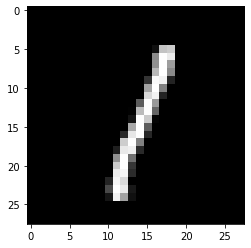

In [4]:
# 隨機印出一張訓練集的圖與答案
import matplotlib.pyplot as plt
%matplotlib inline
import random
c = random.randint(0, 59999)
# 印出該圖答案
print(y_train[c])
# 印出對應的圖
plt.imshow(x_train[c], cmap="gray")

In [5]:
# 印出該圖每一個像素點的色彩值 (0~255)
import pandas as pd
pd.DataFrame(x_train[c])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,204,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,235,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,157,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,138,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,35,0,0,0,0,0,0,0,0,0


## Step2-1: Data preprocessing - Normalize & Reshape
- #### Goal1: Normalize - 把訓練集和測試集題目原本0 ~ 255的值調整到0 ~ 1之間                     
- #### Goal2: Reshape - 把訓練集和測試集題目二維 ( [28 28] ) 攤開成一維 ( [784] ) 

> ### 為何要做Normalize?                   
> 每個特徵值基數差異太大，乘上相同的weight，效果差異太大                    
> keras準備隨機那組weights, 跟normalize後的圖片比較搭
> - Normalize方式:                            
> 調整到0 ~ 1之間 (此例先用這種)                           
> 調整到-1 ~ 1之間 (其實比較多人用這種)                               
    
> ### 為何要Reshape?                
> MLP規定只能接受一維資料
> - Reshape方式: reshape()


In [6]:
# Reshape: .reshape(60000, 784) => 意義: 將共60000筆資料，每筆轉為含有784個值的array (原本是28*28的二維array)
# 已可寫成 .reshape(-1, 784) => python會自動計算 (註: .reshape只有一個位置可以填-1)
# normalize: 直接除以255 (因為原本的值為0~255)
x_train_norm = x_train.reshape(60000, 784) / 255   
x_test_norm = x_test.reshape(10000, 784) / 255

# demo
# 第一筆資料reshape和normalize之後的樣子
x_train_norm[0]
# 全部60000筆資料reshape和normalize之後的樣子
pd.DataFrame(x_train_norm)

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Step2-2: Data preprocessing - One-Hot encoding
#### Goal: 將訓練集和資料集答案轉換為對應含有十個0或1的array [ $ P_0, P_1,...,P_9 $]                                 
*註:P為該位置對應的數的機率                                                        
ex.原本y_train[0]為5，欲轉為 [ 0 0 0 0 0 1 0 0 0 0 ] (第5個位置機率為100%)

> ### 為何要做One-Hot encoding?                                          
> 因為問題經過模型後，得出的output形式為10個機率值, ex. [ 0 0 0 0.2 0 0.8 0 0 0 0 ]
> - One-Hot encoding方式: to_categorical()

In [7]:
from tensorflow.keras.utils import to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

#demo
print("原本訓練集答案的第一筆:", y_train[0])
print("處理後訓練集答案的第一筆:", y_train_cat[0])

原本訓練集答案的第一筆: 5
處理後訓練集答案的第一筆: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


## Step3-1: 建立神經網路模型
- #### 先建立模型支架: Sequential()                           
- #### 再堆上Layers: Dense (全連接層，Fully Connected Layer)

### 激活函式 (Activation Function) 的選擇
中間層必選: relu系列                        
最後一層:              
1. 二元分類 (一個神經元) -> sigmoid，將範圍控制在0~1
2. 二元分類 (一個神經元) -> tanh，將範圍控制在-1~1
3. 多元分類 (多個神經元) -> softmax，呈s型，總和=1
4. 迴歸 -> (無)
 

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# 架好支架(Sequential)
mlp = Sequential()

# 堆層(Dense)
# Dense(unit, activation="") ->這兩個參數一定要給定
# 如何選unit? 看自己習慣；通常 -> 大約是扣一個位數，選10或2的次方倍數 ex. 784 -> 128 -> 10

# 因為是第一層，所以要加input_dim=784
mlp.add(Dense(128, activation="relu", input_dim=784))
mlp.add(Dense(10, activation="softmax"))
mlp.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


### Param :即weights -> 需要調整的參數
Param = 784 * 128 (神經元的連結) + 128 (128個輸出，128個激活 -> 128個bias)         
Param = 128 * 10 (神經元的連結) + 10 (10個輸出，10個激活 -> 10個bias)                 
- 一個激活函式 (activation) -> 配一個bias          


> ### 為何要有Bias (偏差)?                                         
> 為了使每個有不一樣偏移量 (想像為及格分數) 的激活函式，都統一從0開始激活
> - Bias哪裡來?                        
即係數，$ \frac{\mathrm d Loss}{\mathrm d x} $，梯度會直接幫你調整

## Step3-2: 確定模型的訓練方式
- 確定模型的訓練方式的方式: compile()

###  Loss (誤差) 的選擇
#### 誤差: 距離的算法有多種；不同情況用不同的度量標準( 因為什麼是"正確"很難被定義)        
- 之前: 用MSE算預測與正確的距離                                 
- 現在: 輸出是機率，因此改以亂度來看(KL亂度)，即兩個機率距離 (預測跟正確機率分布的差值)
> - 最後輸出一個神經元:使用 binary_crossentropy
> - 最後輸出多個神經元:使用 categorical_crossentropy

###  Optimizer (優化器) 的選擇
#### 即選擇梯度下降的優化手段
> 優化手段包含:
> - 動態步長 (AdaGrad): 概念類似找門牌。先大步找到接近的區間，再小步找到對的位置
> - 動量優化 (Momentum): 欲盡可能解決局部Min/全局Min的問題。不是等速走，而是有速度的累積
> - adam優化器: 綜合以上兩者 (大部分情況都選擇它)

In [9]:
# metrics=["accuracy"] -> 除了loss，還要輸出什麼樣衡量(模型好壞)的標準
mlp.compile(loss="categorical_crossentropy",
            optimizer="adam",
            metrics=["accuracy"])

## Step3-3: 訓練模型
mlp.fit(x_train_norm,
        y_train_cat,
        batch_size=200,
        epochs=15,
        validation_split=0.1,
        verbose=2)
- #### batch_size: 看幾筆做一次梯度下降 (修正)；一般會取100或200左右的值
batch_size=5400 -> 最好，因為看的最全面，但會有時間上的問題   
batch_size=1 -> 最差，因為若看到離群值就會誤判
- #### epochs: 整個訓練資料看幾次                                       
並不是看越多次越好，看太多會有過擬合問題   
- #### validation_split: 將訓練集再拆分成兩份，一份讓模型看，一份拿來測試成果
validation_split=0.1 -> 將60000筆資料拆成54000筆和6000筆
- #### verbose: 跟訓練無關，只是指印出訓練資訊的詳細程度 (0:不印, 1:最多, 2:適中)   
  

In [10]:
mlp.fit(x_train_norm, 
        y_train_cat,
        batch_size=200,
        epochs=15,
        validation_split=0.1,
        verbose=2)

Train on 54000 samples, validate on 6000 samples
Epoch 1/15
54000/54000 - 2s - loss: 0.4301 - accuracy: 0.8850 - val_loss: 0.1936 - val_accuracy: 0.9515
Epoch 2/15
54000/54000 - 1s - loss: 0.2003 - accuracy: 0.9430 - val_loss: 0.1393 - val_accuracy: 0.9623
Epoch 3/15
54000/54000 - 1s - loss: 0.1472 - accuracy: 0.9584 - val_loss: 0.1142 - val_accuracy: 0.9682
Epoch 4/15
54000/54000 - 1s - loss: 0.1164 - accuracy: 0.9673 - val_loss: 0.1004 - val_accuracy: 0.9720
Epoch 5/15
54000/54000 - 1s - loss: 0.0957 - accuracy: 0.9727 - val_loss: 0.0911 - val_accuracy: 0.9735
Epoch 6/15
54000/54000 - 1s - loss: 0.0803 - accuracy: 0.9770 - val_loss: 0.0858 - val_accuracy: 0.9772
Epoch 7/15
54000/54000 - 1s - loss: 0.0695 - accuracy: 0.9802 - val_loss: 0.0846 - val_accuracy: 0.9762
Epoch 8/15
54000/54000 - 2s - loss: 0.0592 - accuracy: 0.9838 - val_loss: 0.0799 - val_accuracy: 0.9773
Epoch 9/15
54000/54000 - 1s - loss: 0.0514 - accuracy: 0.9860 - val_loss: 0.0786 - val_accuracy: 0.9770
Epoch 10/15
540

### 數據觀察重點: val_loss
- 若val_loss變動越來越小，則訓練可以停止；若最後反而上升，則表示訓練太多次(epochs設太高)，有過擬合現象產生
- 不用看loss；因為拿來訓練調整weights的loss必定往下降，所以不具觀察意義                            
*註: loss為訓練資料誤差；val_loss為驗證資料誤差

## Step4-1: Predict & Evaluate
#### 對測試集的10000筆資料進行預測；查看模型的正確率

In [11]:
# 若使用mlp.predict(x_test_norm) -> 會輸出10000筆含有10個機率值的array(代表每個符合對應位置數字的機率值)
# mlp.predict_classes(x_test_norm) -> 轉為機率值最高所對應的那個數字
pre = mlp.predict_classes(x_test_norm)
pre

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [12]:
# evaluate: 幫你印出預測答案的 [loss, 正確率]
mlp.evaluate(x_test_norm, y_test_cat)

10000/10000 [==============================] - 1s 80us/sample - loss: 0.0715 - accuracy: 0.9793


[0.07150468332136516, 0.9793]

## Step4-2: Print Confusion Matrix
#### 印出混淆矩陣觀察哪些數字容易預測錯誤

In [13]:
# 畫出混淆矩陣confusion matrix
import numpy as np
from sklearn.metrics import confusion_matrix
c = ["{}(預測)".format(i) for i in range(10)]
i = ["{}(正確)".format(i) for i in range(10)]

# 注意: 在confusion matrix中，y_test要記得使用"沒有"normalize過的
mat = confusion_matrix(y_test, pre)
mat = [np.round(row / sum(row), 3) for row in mat]
pd.DataFrame(mat, columns=c, index=i)

,0(預測),1(預測),2(預測),3(預測),4(預測),5(預測),6(預測),7(預測),8(預測),9(預測)
0(正確),0.990,0.000,0.001,0.003,0.000,0.001,0.002,0.001,0.002,0.000
1(正確),0.000,0.990,0.002,0.002,0.000,0.000,0.002,0.000,0.004,0.000
2(正確),0.000,0.001,0.977,0.004,0.002,0.000,0.002,0.007,0.008,0.000
3(正確),0.001,0.000,0.000,0.989,0.000,0.002,0.000,0.002,0.003,0.003
4(正確),0.000,0.000,0.000,0.001,0.979,0.000,0.004,0.001,0.002,0.013
5(正確),0.002,0.001,0.000,0.015,0.002,0.966,0.006,0.000,0.006,0.002
6(正確),0.003,0.003,0.001,0.001,0.002,0.003,0.985,0.000,0.001,0.000
7(正確),0.000,0.003,0.007,0.004,0.001,0.000,0.000,0.978,0.004,0.004
8(正確),0.004,0.000,0.002,0.010,0.003,0.001,0.002,0.004,0.969,0.004
9(正確),0.002,0.002,0.000,0.011,0.010,0.004,0.000,0.003,0.001,0.967


## Step4-3: 印出所有預測錯誤的圖及其他資訊

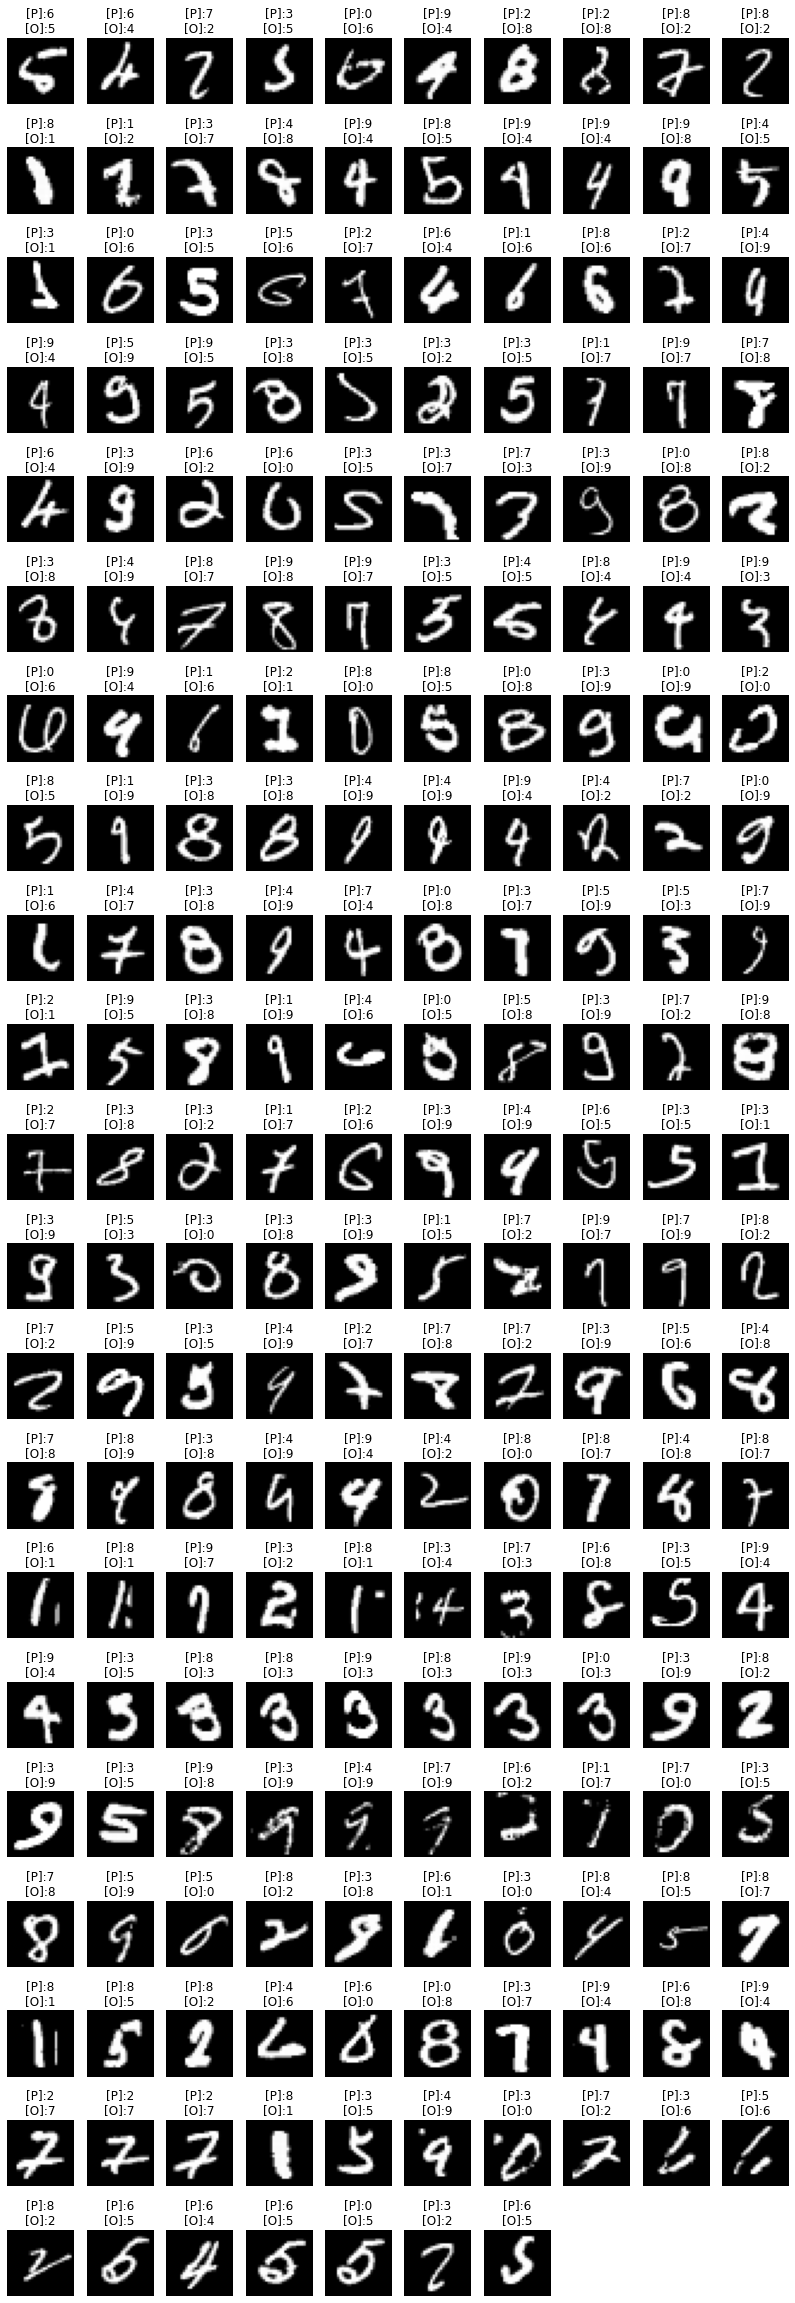

In [14]:
# 印出預測錯誤的索引
idx = np.nonzero(pre != y_test)[0]
# np.nonzero(pre != y_test): 為一tuple，因此我們拿出第一項 =>[0]
# 注意: numpy才能這樣直接每個數字比較

# 把預測錯誤的圖拿出來
false_pre_img = x_test[idx]
# 預測錯誤的圖的原本(正確)標籤
false_pre_label = y_test[idx]
# 預測錯誤的圖的預測(錯誤)標籤
false_pre_predict = pre[idx]

# 設定整張圖的寬高
plt.figure(figsize=(14,42))
# 每列10張
width = 10
height = int(len(idx) / width) + 1
for (i, img) in enumerate(false_pre_img):
    plt.subplot(height, width, i+1)
    t = "[P]:{}\n[O]:{}".format(false_pre_predict[i],
                                false_pre_label[i])
    plt.title(t)
    plt.axis("off")
    plt.imshow(img, cmap="gray")

# .subplot: 將一張畫布切分成區 (高, 寬, 第幾張)
# enumerate: 幫每張圖列出索引 (0, 圖)、(1, 圖)......

## 利用此模型，製作數字圖片預測器

檔名:C:\Users\yueh lun\Desktop\Deep Learning\3.png
正確答案應該是: 3


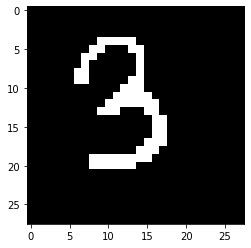

In [15]:
from tensorflow.keras.preprocessing.image import load_img
f = input("檔名:")
img_raw = load_img(f, target_size=(28,28)).convert("L")
# .convert("L"): 轉成灰階 ("L"模式為灰階)

# 將圖像攤開並normalize
img = np.array(img_raw).reshape(1, 784) /255

answer = mlp.predict_classes(img)[0]
# 只有一筆資料，因此[0]

print("正確答案應該是:", answer)
plt.imshow(img_raw, cmap="gray")